Learning from continuous data is almost identical to learning from discrete data. Instead of generating local scores using BDeu scoring, BGe scoring is used. BGe scoring implicitly assumes the data is sampled from some (unknown) Gaussian distribution.

First we import the `Gobnilp` class and create a `Gobnilp` object as usual.

In [1]:
from gobnilp import Gobnilp
m = Gobnilp()

Academic license - for non-commercial use only


The method `use_continuous_data` does everything we need: reads in data, computes local scores, creates a MIP model and the solves it. Here we use the data file `gaussian.dat`. This data is called 'gaussian.test' in [bnlearn](http://bnlearn.com).

**********
BN has score -54052.41081344564
**********
A<- -7124.782936593152
B<- -12656.351445396509
C<-A,B -3743.043565645632
D<-B -1548.939409177594
E<-C,F,G -7312.558564066843
G<- -10530.165518128275
F<-A,D,G -11136.569374437633
**********
[A][B][C|B:A][D|B][E|G:C:F][G][F|D:G:A]
CPDAG:
Vertices: ['A', 'B', 'C', 'D', 'E', 'G', 'F']
A->C
A->F
B->C
B-D
C->E
D->F
G->E
G->F
F->E



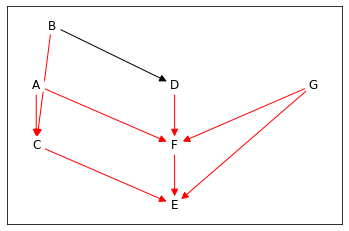

In [2]:
m.use_continuous_data('gaussian.dat')

bnlearn's hillclimbing algorithm actually finds a higher-scoring network from the same data. The problem is that we have been using the default parent set size limit of 3. This default value is to make learning practical on datasets with many variables. But here we only have 7 variables so truly optimal learning is easy and we can run with no limit on parent set size.

**********
BN has score -53258.94161814058
**********
A<- -7124.782936593152
B<- -12656.351445396509
C<-A,B -3743.043565645632
D<-B -1548.939409177594
E<- -10545.851006239516
F<-A,D,E,G -7109.807736959905
G<- -10530.165518128275
**********
[A][B][C|B:A][D|B][E][F|D:G:A:E][G]
CPDAG:
Vertices: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
A->C
A->F
B->C
B-D
D->F
E->F
G->F



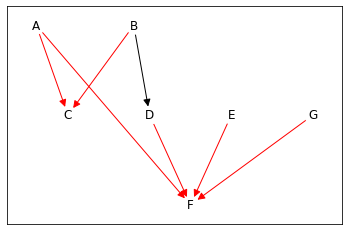

In [3]:
m = Gobnilp()
m.use_continuous_data('gaussian.dat',palim=None)

OK, that's a better network. In fact bnlearn also learns a network with this score when using hill-climbing.